In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.sparse import lil_matrix, csr_matrix
import sys
import psutil
import time

In [9]:
def build_quarter(houses, x0, y0):
    houses[y0:y0 + 78, x0:x0 + 18] = 1
    houses[y0:y0 + 18, x0:x0 + 30] = 1

    houses[y0 + 78 + 21:y0 + 78 + 21 + 18, x0:x0 + 18] = 1
    
    houses[y0:y0 + 18, x0 + 30 + 39:x0 + 30 + 39 + 18] = 1

    houses[y0 + 78 + 21:y0 + 78 + 21 + 18, x0 + 18 + 39:x0 + 18 + 39 + 30] = 1
    houses[y0 + 18 + 21:y0 + 18 + 21 + 78, x0 + 30 + 39:x0 + 30 + 39 + 18] = 1

    return houses

In [10]:
def build_matrix_of_houses():
    houses = np.zeros((300, 300))

    houses = build_quarter(houses, 69, 12)
    houses = build_quarter(houses, 69, 12 + 78 + 21 + 18 + 36)
    houses = build_quarter(houses, 69 + 18 + 51 + 18 + 36, 12)
    houses = build_quarter(houses, 69 + 18 + 51 + 18 + 36, 12 + 78 + 21 + 18 + 36)

    return houses


In [11]:
def si_method(A, x, e=10e-6,  n_iter = 50000):
    for i in range(n_iter):
        x_next = A * x
        err = np.max(np.abs(x_next - x))
        if err <= e:
            x = x_next
            break
        x = x_next
    return x, i, err

In [12]:
def build_paramters_of_equation(M = 300, l1 = 1, l2 = 0, f = 0, k = 0.5, t = 0.25, h = 1):
    h = 1/M
    t = h**2/(4*k)
    c0 = 1 - 4 * t * k / (h * h)  
    c1 = t * (k / (h * h) - l1 / (2 * h))  
    c2 = t * (k / (h * h) + l1 / (2 * h)) 
    c3 = t * (k / (h * h) - l2 / (2 * h))  
    c4 = t * (k / (h * h) + l2 / (2 * h))  
    
    houses = build_matrix_of_houses()

    A = lil_matrix((M * M, M * M))
    u = np.zeros((M * M, 1))

    for i in range(M):
        for j in range(M):
            n = i * M + j  
            x = i
            y = j

            d = np.zeros(M*M)
            indexes = []


            d[n] = c0
            indexes.append(n)

            x = i + 1
            y = j



            if x > 299 or y > 299 or y < 0 or houses[y, x] == 1:
                d[n] += c1
            else:
                indexes.append(x*M+y)
                d[x*M+y] = c1

            x = i - 1
            y = j

            if x - 1 < 0:
                A[n, n] = 1
                u[n, 0] = 1
                continue
            else:
                if x > 299 or y > 299 or y < 0 or houses[y, x] == 1:
                    d[n]+=c2
                else:
                    indexes.append(x * M + y)
                    d[x * M + y] += c2

            x = i
            y = j + 1

            if x > 299 or y > 299 or y < 0 or houses[y, x] == 1:
                d[n]+=c3
            else:
                indexes.append(x * M + y)
                d[x * M + y] += c3

            x = i
            y = j - 1

            if x > 299 or y > 299 or y < 0 or houses[y, x] == 1:
                A[n, n] += c4
                d[n]+=c4
            else:
                indexes.append(x * M + y)
                d[x * M + y] += c4

            for e in indexes:
                A[n, e] = d[e]

    return csr_matrix(A), u

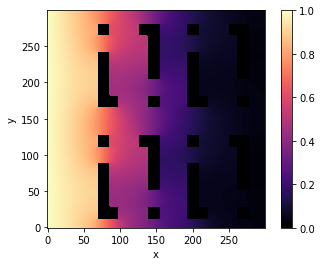

In [13]:
M = 300
start_t = time.time()
A, u = build_paramters_of_equation(M=M, )
s = np.sum(A, axis=0)

u, num_steps, err = si_method(A, u)

end_t = time.time()
plt.imshow(u.reshape((300, 300)).T, origin='lower', cmap="magma")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
np.set_printoptions(threshold=sys.maxsize)

print("Size of cross-shema: " + str(M))
print("Number of iterations: " + str(num_steps))
print("Error: " + str(err))
print("Memory in MB: " + str(psutil.virtual_memory().total >> 20))
print("Time: " + str(end_t - start_t))
print(u)

Size of cross-shema: 300
Number of iterations: 36077
Error: 9.999876414534814e-06
Memory in MB: 16238
Time: 19.846961498260498
[[1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1. 